# HR analytics to predict employee attrition

Features:-
satisfaction_level: Employee satisfaction level 
last_evaluation: Last evaluation  
number_project: Number of projects  
average_montly_hours: Average monthly hours 
time_spend_company: Time spent at the company 
Work_accident: Whether they have had a work accident 
promotion_last_5years: Whether they have had a promotion in the last 5 years 
department: Department 
salary: Salary 
left: Whether the employee has left 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from pandas_profiling import ProfileReport

In [4]:
#Read the dataset
hr_df=pd.read_csv('HR_comma_sep.csv')

In [5]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Pandas-Profiling for initial EDA
report=ProfileReport(hr_df)

In [7]:
#report

In [8]:
#it can be observedc that employee satisfaction value is highly important feature with high correlation to dependent variable(left)
#No missing values 

In [9]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
hr_df.isnull().any().sum()

0

In [12]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [13]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [14]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [15]:
for c_feature in categorical_features:
    hr_df = create_dummies( hr_df, c_feature )

In [16]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [17]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )


In [18]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [19]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
logreg.predict(train_X)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.6404772108300643),
 ('average_montly_hours', 0.004636760160738429),
 ('department_RandD', -0.4528913532956236),
 ('department_accounting', 0.14635299401590807),
 ('department_hr', 0.3937748592484722),
 ('department_management', -0.6846150492266425),
 ('department_marketing', 0.08685546123163937),
 ('department_product_mng', -0.09287435703565679),
 ('department_sales', -0.010706780937223753),
 ('department_support', 0.1633043100045688),
 ('department_technical', 0.24667707573866157),
 ('last_evaluation', 0.31719437190512634),
 ('number_project', -0.2896124148828036),
 ('promotion_last_5years_1', -0.6260568783441851),
 ('salary_low', 1.3410566162025483),
 ('salary_medium', 0.8078754470283415),
 ('satisfaction_level', -4.137863034757528),
 ('time_spend_company', 0.22556816652127143)]

In [22]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [23]:

hr_test_pred = hr_test_pred.reset_index()

In [24]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
2065,2820,0,0
2501,8859,0,0
3650,7823,0,0
2286,14152,0,1
3780,1384,1,1
2288,8117,0,0
3592,7911,0,0
2305,13306,0,0
2384,10341,0,0
4284,4381,0,0


In [25]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted )
cm

array([[3193,  236],
       [ 685,  386]], dtype=int64)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

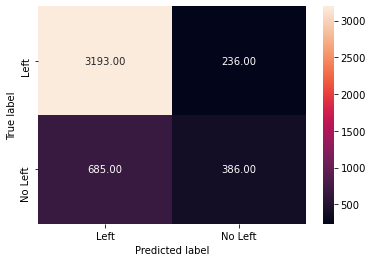

In [27]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [28]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.8

Overall test accuracy is 80%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left.
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

Predict Probability

In [29]:
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

      Work_accident_1  average_montly_hours  department_RandD  \
6958                0                   154                 0   

      department_accounting  department_hr  department_management  \
6958                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6958                     0                       0                 1   

      department_support  department_technical  last_evaluation  \
6958                   0                     0             0.67   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6958               3                        0           0              0   

      satisfaction_level  time_spend_company  
6958                0.54                   2  
[[0.91715246 0.08284754]]


The model is predicting the probability of him leaving the company is only 0.08, which is very low.

In [30]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.917152,0.082848
1,0.948921,0.051079
2,0.936849,0.063151
3,0.857054,0.142946
4,0.914212,0.085788


In [31]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [32]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [33]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

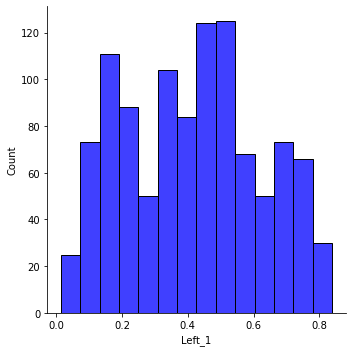

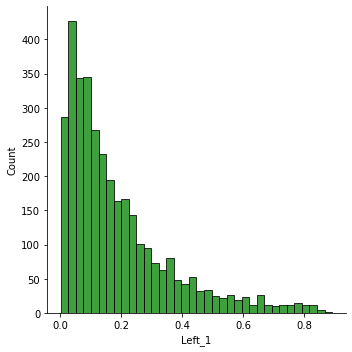

In [34]:
sn.displot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.displot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

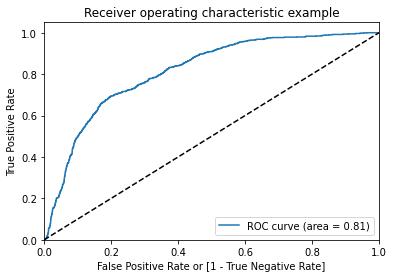

In [35]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [36]:
print(thresholds[0:10])



[1.89150262 0.89150262 0.87664036 0.86546756 0.86024803 0.85867449
 0.85556038 0.8418187  0.83891495 0.83830354]


In [37]:
print(fpr[0:10])

[0.         0.00029163 0.00058326 0.00087489 0.00116652 0.00145815
 0.00174978 0.00204141 0.00233304 0.00233304]


In [38]:
print(tpr[0:10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00093371]


In [39]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [40]:
cutoff_prob

0.2879780872240066

In [41]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.29 else 0 )

In [42]:
cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels)
cm

array([[2726,  703],
       [ 326,  745]], dtype=int64)

In [43]:
clm=metrics.classification_report(hr_test_pred.actual,hr_test_pred.new_labels, )
clm

'              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      3429\n           1       0.51      0.70      0.59      1071\n\n    accuracy                           0.77      4500\n   macro avg       0.70      0.75      0.72      4500\nweighted avg       0.80      0.77      0.78      4500\n'

# Building Decision Tree Model


In [44]:
import sklearn.tree as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree=clf_tree.fit( train_X, train_y )

In [46]:
clf_tree.predict_proba(train_X)

array([[0.98720648, 0.01279352],
       [0.02925046, 0.97074954],
       [0.9411215 , 0.0588785 ],
       ...,
       [0.12608696, 0.87391304],
       [0.9584121 , 0.0415879 ],
       [0.98720648, 0.01279352]])

In [47]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.987206,0.012794
1,0.029250,0.970750
2,0.941121,0.058879
3,0.000000,1.000000
4,0.958412,0.041588


In [48]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1]

0        0.012794
1        0.970750
2        0.058879
3        1.000000
4        0.041588
           ...   
10494    0.012794
10495    1.000000
10496    0.873913
10497    0.041588
10498    0.012794
Name: 1, Length: 10499, dtype: float64

In [49]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [50]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [51]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9708543670825793

In [52]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9655555555555555

In [53]:
train_y.value_counts()

0    7999
1    2500
Name: left, dtype: int64

In [54]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,tree_test_pred.actual,)


In [55]:
tree_cm

array([[3364,   90],
       [  65,  981]], dtype=int64)

In [56]:
print(metrics.classification_report(tree_train_pred.actual,tree_train_pred.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.95      0.93      0.94      2500

    accuracy                           0.97     10499
   macro avg       0.96      0.96      0.96     10499
weighted avg       0.97      0.97      0.97     10499



In [57]:
print(metrics.classification_report(tree_test_pred.actual,tree_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3429
           1       0.94      0.92      0.93      1071

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



In [58]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train_X ) )

In [59]:
predict_proba_df.columns= ['left_0', 'left_1']

In [60]:
metrics.roc_auc_score(train_y,predict_proba_df.left_1 )

0.9727898987373421

In [61]:
#### Fine Tuning the parameters
param_grid = {'max_depth': np.arange(8, 13),
             'max_features': np.arange(6,12)}

In [62]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 8,  9, 10, 11, 12]),
                         'max_features': array([ 6,  7,  8,  9, 10, 11])})

In [63]:
tree.best_score_

0.9774268018784454

In [64]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=9)

In [65]:
tree.best_params_

{'max_depth': 10, 'max_features': 9}

In [66]:
### Building Final Decision Tree Model

In [67]:
clf_tree = DecisionTreeClassifier( max_depth = 11, max_features=9)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=11, max_features=9)

In [68]:
## Feature Importance

In [69]:
clf_tree.feature_importances_

array([6.46551532e-04, 5.90635541e-02, 1.33042484e-03, 9.61326540e-04,
       2.06340148e-04, 1.06207339e-03, 7.19744625e-04, 4.67385791e-04,
       3.46524297e-03, 2.65998383e-04, 4.40653556e-03, 1.00888217e-01,
       1.12881541e-01, 0.00000000e+00, 1.99977477e-03, 8.03767637e-04,
       5.61915324e-01, 1.48916198e-01])

In [70]:
train_X.columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [71]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('Work_accident_1', 0.0006465515323708108),
 ('average_montly_hours', 0.05906355413696296),
 ('department_RandD', 0.0013304248429655604),
 ('department_accounting', 0.0009613265403316141),
 ('department_hr', 0.00020634014808702442),
 ('department_management', 0.0010620733903590968),
 ('department_marketing', 0.0007197446250661987),
 ('department_product_mng', 0.0004673857908756837),
 ('department_sales', 0.0034652429663155977),
 ('department_support', 0.0002659983827099689),
 ('department_technical', 0.00440653556468163),
 ('last_evaluation', 0.10088821662689015),
 ('number_project', 0.1128815410958771),
 ('promotion_last_5years_1', 0.0),
 ('salary_low', 0.001999774766472309),
 ('salary_medium', 0.0008037676370227499),
 ('satisfaction_level', 0.5619153237708122),
 ('time_spend_company', 0.1489161981821993)]

In [72]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [73]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9764444444444444

In [74]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual)


# Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=6, n_jobs=-1, oob_score=True)

In [77]:
radm_clf.n_features_

18

In [78]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [79]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )
metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9837483549850388

In [80]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual)

In [81]:
tree_cm

array([[3420,   32],
       [   9, 1039]], dtype=int64)

In [82]:
radm_clf.feature_importances_

array([0.00671732, 0.13991338, 0.00110606, 0.00130004, 0.00128021,
       0.00151385, 0.0011772 , 0.00080684, 0.0028685 , 0.00253708,
       0.00343876, 0.12307851, 0.1737338 , 0.00110295, 0.00625895,
       0.00336543, 0.34125948, 0.18854166])

In [83]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

<AxesSubplot:xlabel='importance', ylabel='feature'>

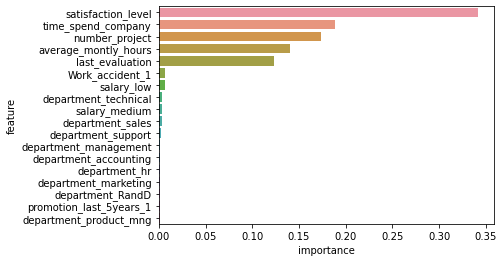

In [84]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )